# Boston Data Analysis - Gradient Descent




## Overview

Continuing the analysis on the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).
Majorly focusing on implement ing our own Gradient Descent algorithm so as to be able to tune the hyper parameters to optimize the linear regression model.
This is purely for exploration purposes. As a Linear model is the simplest of all learning models its very easy to break down and tweak.

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

%matplotlib inline  
import matplotlib.pyplot as plt  
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf


In [3]:
from sklearn.datasets import load_boston
bdata = load_boston()
bos_df = pd.DataFrame(bdata.data, columns=bdata.feature_names)

bos_df['MEDV']=bdata.target

---

## Part 1: Getting oriented

Use different learning rates or step size for the gradient descent

### 1.1 Use existing libraries

Before writing a new gradient descent algorithm, which will be used to minimize the squared error cost function.  First, however, usign the canned versions that comes with Python will be helpful in understanding how it works and setting the standards.

Using the same Boston housing prices dataset, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to explore the relationship between  median housing price and number of rooms per house.
Steps:
(a) regressing the housing price on the number of rooms per house
(b) regressing the housing price on the number of rooms per house and the (number of rooms per house) squared.

In [4]:
# uncomment the following if you want to see a lengthy description of the dataset
# print bdata.keys()
# print bdata.feature_names
# print bdata.data.shape
# print bdata.target.shape
# print bdata.DESCR
import statsmodels.formula.api as smf

# Linear model between CRIM and RM.
regr1 = smf.ols('MEDV ~ RM', data = bos_df).fit()

print("Here we have a the regression summary of (a)")
print(regr1.summary())
print("\n" + "\n")

regr2 = smf.ols('MEDV ~ RM + I(RM**2)', data= bos_df).fit()
print("Here we have a the regression summary of (b)")
print(regr2.summary())

Here we have a the regression summary of (a)
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 23 Feb 2017   Prob (F-statistic):           2.49e-74
Time:                        15:16:21   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Interce

**Observations:**
On first run of the regression model on the data we obatain a negative intercept. This doesn't actually make sense because for the number of rooms =0 we get a negative price, which is not logically possible. We cna try to normalize the feature values of RM, but rather we will preserve the data values of the feature.

**(a):**
Intercept = -34.67
coeff of RM = 9.1021
THe interpretation of this can be acredited as an increasing impact on Median housing price with an increase in the number of rooms by a factor of 9 per increase in rooms. Note: here the negatoive coefficient tells us that the initial value of the housing price is negative. As metioned before, we cannot predict the housing price according to the equation when the number of rooms is really less.

**(b):**
Intercept = 66.0588
coeff of RM = -22.6433
coeff of RM^2 = 2.4701

Here we can observe that in presence of RM^2 the coefficient of RM has swung over to the negative side, with the intercept as positive and higher magnitude.Thus the inclusion of the RM^2 term overshadows the lone RM term. Moreover, we should try to keep less multicollinearity between the variables in linear regression. Apart from this, the most peculiar observation is that, the standard erros here is much greater than in **(a)**. THis goes to tell us that the accuracy of hte prediction here is not as reliable as in the previous example.

**Conclusion:** Higher the level of multicollinearity in the features of a linear regresison model the lesser significant/accurate the coefficients will be.

### 1.2 Training and testing

Chances are, for the above problem all of our data was used to fit the regression line. In some circumstances this is a reasonable thing to do, but often this will result in overfitting. Recomputing the above results the ML way, using careful cross-validation.

Using the [cross-validation functions](http://scikit-learn.org/stable/modules/cross_validation.html) from scikit-learn, 250-fold cross-validation to fit regression (a) above, i.e. the linear fit of housing price on number of rooms per house. Each fold of cross-validation will give one slope coefficient and one intercept coefficient. 
Plotting the distribution of the 250 slope coefficients using a histogram with 25 bins, then draw a vertical line at the value of the slope coefficient that is estimated in 1.1 using the full dataset.

In [5]:
from sklearn.cross_validation import KFold
from sklearn import linear_model

X = bos_df['RM']
Y = bos_df['MEDV']


# Implementing 250 KFolds
kf = KFold(len(bos_df), n_folds=250)

# defining the linear model and the coeff list
lm = linear_model.LinearRegression()
coef_list = []

# runnig a for loop for all the 250 folds.
for train, test in kf:
    X_train, X_test = X[train], X[test]
    Y_train, Y_test = Y[train], Y[test]
    X_train = X_train.reshape(-1,1)
    Y_train = Y_train.reshape(-1,1)
    # fitting the linear model
    k_regr = lm.fit(X_train, Y_train)
    coef_list.append(k_regr.coef_[0][0])

C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


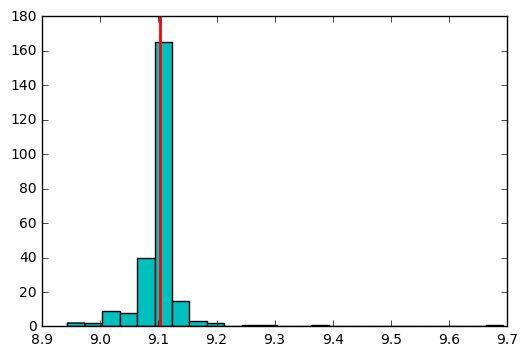

In [6]:
# plotting the data
plt.hist(coef_list, bins =25, color='c')
plt.axvline(9.1021, color='red', linewidth=2)

**Observation:**
On plotting the histogram of the 250 folds linear regression model, we get the data to be majorly in the range of 9.05 to 9.15 with around 165 instances with the value in the range 9.10 to 9.125. The frequency of this coefficient value is well evident from the histogram plot.
On plotting the estimate from our previous computation, we observe that it falls in the maximum freq range mentioned above. Therfore, our linear model gave us a very accurate value for the coefficient, being in line with the std.error of the regression prediction being low(0.419).

### 1.3 Regression lines

Creating a scatterplot of housing price on rooms per house, and adding the two regression lines from 1.1 or 1.2. Show the linear regression line in red, and the linear+quadratic regression line (which may have curvature) in blue. Label these two regression lines with the corresponding regression equations (i.e. the slope and intercept of the line).

Also, adding the 95% confidence bands (i.e., the area that has a 95% chance of containing the true regression line) to each of these lines.

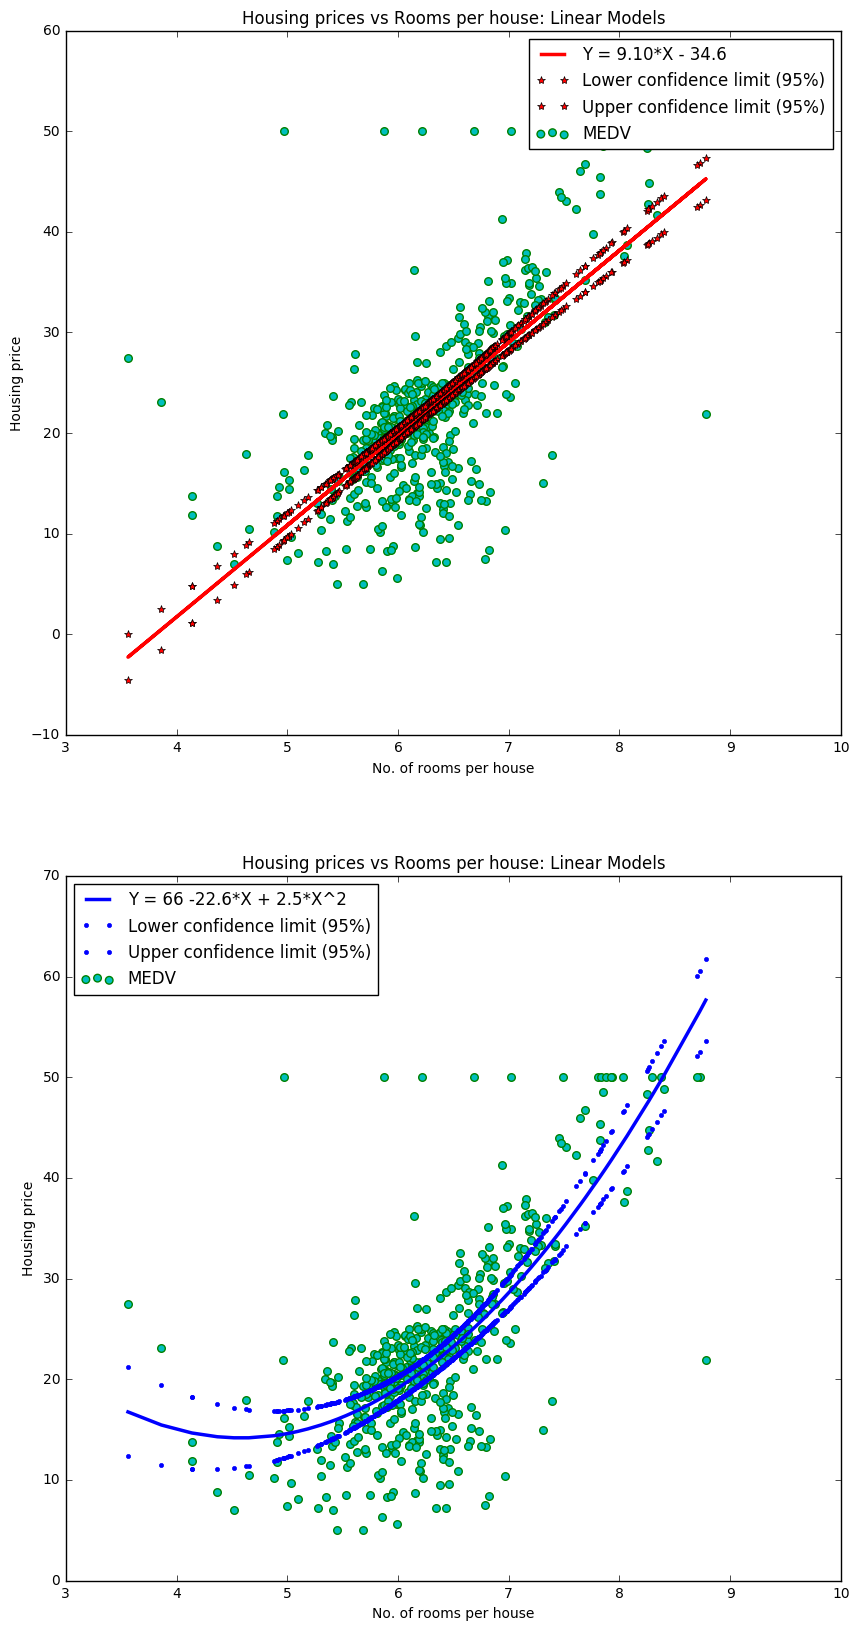

In [7]:

fig = plt.figure(figsize=(10, 20))


# Scatter plot
plt.subplot(211)
plt.scatter(bos_df.RM, bos_df.MEDV, s=30, c='c', edgecolor='g')
plt.xlabel("No. of rooms per house")
plt.ylabel("Housing price")
plt.title("Housing prices vs Rooms per house: Linear Models")

# plotting the regression line
Y1 = regr1.params[1]*X + regr1.params[0]
plt.plot(X, Y1, c='r', linewidth=2.5, label = 'Y = 9.10*X - 34.6')

# Plotting the confidence bands
y1_er = Y - Y1   # residuals
mean_x1 = np.mean(X)
n = len(X)
t = 1.96 #df ~ 506
sq_er1 = np.sum(np.power(y1_er,2)) 

conf1 = t * np.sqrt((sq_er1/(n-2))*(1.0/n + (np.power((X-mean_x1),2)/
            ((np.sum(np.power(X,2)))-n*(np.power(mean_x1,2))))))

lwr1 = Y1 - abs(conf1)
upr1 = Y1 + abs(conf1)

# plotting confidence interval
plt.plot(X,lwr1,'r*',label='Lower confidence limit (95%)')
plt.plot(X,upr1,'r*',label='Upper confidence limit (95%)')
plt.legend(loc="best")



plt.subplot(212)
plt.scatter(bos_df.RM, bos_df.MEDV, s=30, c='c', edgecolor='g')
plt.xlabel("No. of rooms per house")
plt.ylabel("Housing price")
plt.title("Housing prices vs Rooms per house: Linear Models")

# plotting the Multi-regression line
X_sort = np.sort(X)
Y2 = regr2.params[2]*X_sort**2 + regr2.params[1]*X_sort + regr2.params[0]
plt.plot(X_sort, Y2, c='b', linewidth=2.5, label='Y = 66 -22.6*X + 2.5*X^2')
# plt.label(regr2.params[0] + " " + regr2.params[1] + "*X" + regr2.params[2] + "*X^2")

# Plotting the confidence bands
y2_er = Y - Y2   # residuals
mean_x2 = np.mean(X_sort)
n = len(X_sort)
t = 1.96 #df ~ 506
sq_er2 = np.sum(np.power(y2_er,2))

conf2 = t * np.sqrt((sq_er2/(n-2))*(1.0/n + (np.power((X_sort-mean_x2),2)/
            ((np.sum(np.power(X_sort,2)))-n*(np.power(mean_x2,2))))))

lwr2 = Y2 - abs(conf2)
upr2 = Y2 + abs(conf2)

# plotting confidence interval
plt.plot(X_sort,lwr2,'b.',label='Lower confidence limit (95%)')
plt.plot(X_sort,upr2,'b.',label='Upper confidence limit (95%)')

plt.legend(loc="best")

## Part 2: Gradient descent: Linear Regression

This is where it gets fun!

### 2.1 Implement gradient descent with one independent variable (Average rooms per house)

Implementing the batch gradient descent algorithm. Using the version implemented to regress the housing price on the number of rooms per house. Experimenting with 3-4 different values of the learning rate *R*

In [8]:
import time

"""
Function
--------
bivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta: float
    co-efficient
"""

def getJ(xvalues, yvalues, alpha, beta):
    error = alpha + beta*xvalues - yvalues
    n = len(xvalues)
    J = (1.0/2*n) * np.dot(error,error)
    return J

def bivariate_ols(xvalues, yvalues, R, MaxIterations=1000):
    # initialize the parameters
    alpha = 10
    beta = 10
    J = getJ(xvalues, yvalues, alpha, beta)
    minJ = J
    epsilon = 0.0001
    n = len(xvalues)
    
    gradient_a = (1.0/n) * (alpha +beta*xvalues - yvalues).sum()
    gradient_b = (1.0/n) * np.dot((alpha +beta*xvalues - yvalues),xvalues)
    counter =0
    res = True
    start_time = time.time()
    # finding cost function.
    while True:
        if(counter == MaxIterations):
            print("Max Iterations reached.")
            break
        # Update alpha and beta
        alpha -= R * gradient_a
        beta -= R * gradient_b
        
        # calculate J value
#         error = alpha + beta*xvalues - yvalues
#         newJ = (1.0/2*n) * np.dot(error,error)
        newJ = getJ(xvalues, yvalues, alpha, beta)
    
        if( abs(newJ-J) <= epsilon):
            # Minimum point reached. progress saved
            print("Number of iterations reached", counter)
            break

        gradient_a = (1.0/n) * (alpha +beta*xvalues - yvalues).sum()
        gradient_b = (1.0/n) * np.dot((alpha +beta*xvalues - yvalues),xvalues)
        J = newJ
        counter += 1
        
    print ("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    return alpha, beta

In [9]:
X = bdata.data[:, 0]
Y = bdata.target[:]
print("Alpha and Beta values: for R = 0.001")
print(bivariate_ols(X, Y, 0.001, 100000))
print()
print("Alpha and Beta values: for R = 0.005")
print(bivariate_ols(X, Y, 0.005, 100000))
print()
print("Alpha and Beta values: for R = 0.01")
print(bivariate_ols(X, Y, 0.01, 100000))

Alpha and Beta values: for R = 0.001
Number of iterations reached 11631
Time taken: 0.26 seconds
(24.015485527268897, -0.41274393822083283)

Alpha and Beta values: for R = 0.005
Number of iterations reached 2511
Time taken: 0.05 seconds
(24.015892110893343, -0.41276096330259432)

Alpha and Beta values: for R = 0.01
Number of iterations reached 1294
Time taken: 0.03 seconds
(24.015990155741346, -0.41276506878410713)


**The values of alpha and beta that minimize the loss function**
The values of alpha and beta obtined here are:
    alpha = 24.015485527268897
    Beta = -0.41274393822083283

**The number of iterations it takes for your algorithm to converge (for each value of R)**
The iterations were 11631, 2511, 1294 for the R-values of 0.001, 0.005, 0.01 respectively.

**The total running time of your algorithm, in seconds**
The Total Running time for the R values[0.001, 0.005, 0.01] were [0.24, 0.05, 0.02]

**Observations**
we can see that for multiple values of R we do converge to the optimum solution. But, this can definitely vary with the data. But, when we increase the value of R we get 'nan' values in the alpha and beta. THis may be because of of high negative values in alpha and beta.
WE can conclude that, wiht higher step size the convergence may take time. therfore, if we plot the convergence speed against the R value we assume to get a normal/bell shape curve. Implicating that the convergence speed will be the lowest when the value of R is too low and too much,and the max speed when the R value is perfectly in between the high and low.

### 2.2 Data normalization (done for you!)

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, we want to give you some code in case you want to standardize your features.

In [12]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using CRIM and RM as independent variables. Standardize these variables before before inputting them to the gradient descent algorithm. 

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with 2-3 different values of R.

* *Hint 1: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem*

In [10]:
"""
Function
--------
multivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""

def multivariate_ols(xvalue_matrix, yvalues, R=0.001, MaxIterations=1000):
    # initialize the parameters
    alpha, n, epsilon, counter = 10, len(xvalue_matrix), 0.0001, 0
    
    m = len(xvalue_matrix[0])
    # beta will be in the form of list
    beta = [10]*n
    b_total = [0]*n
    newb_total = [0]*n
    gradient_b = [0]*n
    
    # Initial value of J
    for i in range(n):
        b_total[i] = [beta[i]* x for x in xvalue_matrix[i]]
    b_total = [alpha + x + y for x,y in zip(b_total[0], b_total[1])]
    error = b_total - yvalues
    
    J = (1.0/2*m)*np.dot(error, error)    

    # Calculating the gradient
    gradient_a = R * (1.0/m)* ((error).sum())

    for j in range(n):
        gradient_b[j] = R * (1.0/m)*(np.dot(error, xvalue_matrix[j]))

    Jlist=[]
    start_time = time.time()
    while True:
        # Max iteration conditions
        if (counter == MaxIterations):
            print ('\nMaximum Iterations reached!')
            break

        #Updating the parameters
#        print("ALPHA:", alpha, " -> ", end='')
        alpha -= gradient_a
#         print(alpha, " grad:", gradient_a)
        
#         print("BETA:", beta, " -> ", end='')
        for j in range(n):
            beta[j] -= gradient_b[j]
#         print(beta, " grad:", gradient_b)
        
        #Calculating the cost with the updated parameters
        for i in range(n):
            newb_total[i] = [beta[i]* x for x in xvalue_matrix[i]]
        
        newb_total = [alpha + x + y for x,y in zip(newb_total[0], newb_total[1])]
        new_error = newb_total - yvalues
        
        # debugging
#         print("ERROR:", error[10], " -> ", new_error[10])
#         print("Dor prod:", np.dot(new_error, new_error))
        
        new_J = (1.0/2*m)*((new_error**2).sum())
        
        Jlist.append(new_J)
#         print("J values:")
#         print(J, " -> ", new_J)
#         print()
        
        # Terminating condition
        if (abs(J - new_J) <= epsilon):
            print ('\nNumber of iterations taken:',counter)
            break
            
        # update gradient
        gradient_a = R * (1.0/m)* ((error).sum())

        for j in range(n):
            gradient_b[j] = R * (1.0/m)*(np.dot(error, xvalue_matrix[j]))
        
        J = new_J
        error = new_error
        counter +=1
#         #updated_cost_function = np.dot(updated_Jab, updated_Jab)/float(2*n)

    print ("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    return alpha, beta

# Uncomment this for a simple plot of the change in J value.
# def J_plot(Jlist):
#     plt.plot(range(10), Jlist, c='r')


In [13]:
X_matrix = [standardize(bdata.data[:,0]), standardize(bdata.data[:,5])]
# R = 0.001
print("For the value of R = 0.001")
print_a, print_b = multivariate_ols(X_matrix , Y, 0.001, 100000)
print("Alpha value = ", print_a)
print("Beta value = ", print_b)
print()

# R = 0.01
print("For the value of R = 0.01")
print_a, print_b = multivariate_ols(X_matrix , Y, 0.01, 100000)
print("Alpha value = ", print_a)
print("Beta value = ", print_b)
print()

# R = 0.1
print("For the value of R = 0.1")
print_a, print_b = multivariate_ols(X_matrix , Y, 0.1, 100000)
print("Alpha value = ", print_a)
print("Beta value = ", print_b)
print()

# R = 1
print("For the value of R = 1")
print_a, print_b = multivariate_ols(X_matrix , Y, 1, 100000)
print("Alpha value = ", print_a)
print("Beta value = ", print_b)
print()

For the value of R = 0.001

Number of iterations taken: 12270
Time taken: 6.45 seconds
Alpha value =  22.5327486728
Beta value =  [-2.2480448860231048, 5.8949784475167073]

For the value of R = 0.01

Number of iterations taken: 1360
Time taken: 0.63 seconds
Alpha value =  22.5327938313
Beta value =  [-2.2484324843113459, 5.894592979996176]

For the value of R = 0.1

Number of iterations taken: 134
Time taken: 0.04 seconds
Alpha value =  22.532805081
Beta value =  [-2.248560237777125, 5.8944655848648502]

For the value of R = 1

Maximum Iterations reached!
Time taken: 37.33 seconds
Alpha value =  nan
Beta value =  [nan, nan]



The values of Alpha and Beta for every R value used is printed above ad we can see that we get consistent values, showing convergence.
We see that the coefficient Beta_1 is negative, in contrast with the posotive value in the previous iteration. This can be due to the fact that, the importance of the other feature(RM) overshadows this one(CRIM).

The number of iterations taken by the algorithm definitely decreases with the increase in R values. It converges pretty fast from 12270 oterations to 134 iterations to converge, by hangin the R value from 0.001 to 0.1, but we get nan values when we set R = 1 showing that the values of alpha and beta turned out to be out of bounds.
The running time is directly propotional to the number of iterations, and we can imply the same conclusion stated above for the time taken. It's maximum for the worst value of R.

### 2.4 Compare standardized vs. non-standardized results

Repeating the analysis from 2.3, but this time without standardizing your variables - i.e., use the original data. Using the same three values of R (0.1, 0.01, and 0.001).

In [14]:
X_matrix2 = [bdata.data[:,0], bdata.data[:,5]]
# R = 0.001
print("For the value of R = 0.001")
print_a, print_b = multivariate_ols(X_matrix2 , Y, 0.001, 100000)
print("Alpha value = ", print_a)
print("Beta value = ", print_b)
print()

# R = 0.01
print("For the value of R = 0.01")
print_a, print_b = multivariate_ols(X_matrix2 , Y, 0.01, 100000)
print("Alpha value = ", print_a)
print("Beta value = ", print_b)
print()

# R = 0.1
print("For the value of R = 0.1")
print_a, print_b = multivariate_ols(X_matrix2 , Y, 0.1, 100000)
print("Alpha value = ", print_a)
print("Beta value = ", print_b)
print()

For the value of R = 0.001

Maximum Iterations reached!
Time taken: 40.23 seconds
Alpha value =  -16.8753100817
Beta value =  [-0.30333005698685156, 6.4661559561477002]

For the value of R = 0.01

Number of iterations taken: 68628
Time taken: 26.28 seconds
Alpha value =  -29.2842541823
Beta value =  [-0.26188110638629375, 8.394823075514191]

For the value of R = 0.1

Maximum Iterations reached!
Time taken: 29.5 seconds
Alpha value =  nan
Beta value =  [nan, nan]



**Observation:**

From the above results it is evident that without the standardization of the features, the whole process takes a much larger time and also requires more iterations to converge to. Stanrdizing or normalizing helps us increase the variance of each contributing value/feature this eradicates the dominance of one or more kind of values.
Thus, gradient descent in the logistic regression converges much faster on standardized data than on a much smoother data. Moreover, standardization resolves mulitcoliniearity in the data, which is supposed to be detrimental for the linear regression model.

We can observe the nan values when R = 1 because the variable gets incremented out of bounds when the step size is large.

## 3. Prediction

Using the fitted model to make predictions about housing prices. Since the focus is now on prediction rather than the interpretation of the coefficients, it would be wise to first standardize the features before proceeding.

### 3.1 Cross-Validation

Using k-fold cross-validation to re-fit the multivariate regression from 2.3 above, and report your estimated coefficients (there should be three, corresponding to the intercept and the two coefficients for CRIM and RM). Or randomly dividing the data into a training set (66%) and testing set (34%) and use the training set to re-fit the regression from 2.3 above copuld also be done.

In [15]:
from statsmodels.tools.eval_measures import rmse

# Standardizing the Values
X_matrix = [standardize(bdata.data[:,0]), standardize(bdata.data[:,5])]

# Implementing 10 Fold Cross validation
kf2 = KFold(len(bos_df), n_folds=10)

# creating empty lists to store the iterative values
k_alpha = []
k_beta = []

# intializing sum counters for multiple features
beta_sum1 = 0
beta_sum2 = 0

# initializing RMSE
rmse_avg = 0
pred = [0]*n
new_matrix=[]

# runnig a for loop for all the 10 folds.
for train, test in kf2:
    # for feature 1
    X_train1, X_test1 = X_matrix[0][train], X_matrix[0][test]
    # for feature 2
    X_train2, X_test2 = X_matrix[1][train], X_matrix[1][test]
    
    Y_train, Y_test = Y[train], Y[test]
#     X_train1 = X_train1.reshape(-1,1)
#     X_train2 = X_train2.reshape(-1,1)
#     Y_train = Y_train.reshape(-1,1)

    new_matrix = [X_train1, X_train2]
    # Implementing gradient Descent
    a, b = multivariate_ols(new_matrix , Y_train, 0.1, 100000)
    k_alpha.append(a)
    k_beta.append(b)
    
    # calucating RMSE
    
    pred[0] = [b[0]* x for x in X_test1]
    pred[1] = [b[1]* x for x in X_test2]
    pred = [a + x + y for x,y in zip(pred[0], pred[1])]

    rmse_avg += rmse(pred, Y_test)

# To calculate the alpha and beta
Kfold_alpha = sum(k_alpha)/len(k_alpha)
Kfold_beta = []

for i in range(len(k_beta)):
    beta_sum1 += k_beta[i][0]
    beta_sum2 += k_beta[i][1]

Kfold_beta.append(beta_sum1/len(k_beta))
Kfold_beta.append(beta_sum2/len(k_beta))

print("-"*125)
print("-"*125)
print("The coefficents(Averaged out) are:")
print("Alpha=", Kfold_alpha)
print("Beta_1 = ", Kfold_beta[0])
print("Beta_2 = ", Kfold_beta[1])


Number of iterations taken: 130
Time taken: 0.04 seconds

Number of iterations taken: 125
Time taken: 0.05 seconds

Number of iterations taken: 134
Time taken: 0.04 seconds

Number of iterations taken: 128
Time taken: 0.08 seconds

Number of iterations taken: 132
Time taken: 0.12 seconds

Number of iterations taken: 129
Time taken: 0.1 seconds

Number of iterations taken: 127
Time taken: 0.09 seconds

Number of iterations taken: 217
Time taken: 0.15 seconds

Number of iterations taken: 172
Time taken: 0.11 seconds

Number of iterations taken: 126
Time taken: 0.08 seconds
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
The coefficents(Averaged out) are:
Alpha= 22.5149444122
Beta_1 =  -2.24914574662
Beta_2 =  5.88724889899


On applying the cross validation phase, we see that the gradient descent is taking even lesser time to converge and the prediction of the coefficents tally as well. On observing the k_alpha and k_beta closely we see that all the 10 folds reault in very similar values. This goes to show that standardizing along with cross validation actually increases our speed of convergence.

### 3.2 Predicted values and RMSE

Computing the RMSE on your test cases, i.e. taking the model parameters found above and compare the actual to the predicted values for just the test instances. This will be the average RMSE across the k test sets.


In [16]:
# RMSE code is added to 3.1
print("The average RMSE value is = ", rmse_avg/len(k_beta))

The average RMSE value is =  5.77254529291


The test RMSE is printed above. There is a huge improvement when compared to the previous implementation of k nearest neighbour. This goes to show that sometimes, a simple model line linear regression with optimization criterion of gradient descent can lead to a much better result.
This method is both faster and more accurate when compared to the knearest-neighbor.

### ToDo: Logistic Regression

Implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $400,000. Using the model a logistic regression of EXPENSIVE on CHAS and RM and looking at the results.

In [ ]:
# Your code here

*Discuss your results here*

## 4 Regularization 

### 4.1 Getting prepped

Step 1: Creating new interaction variables between each possible pair of the F_s features and standardizing all of your features.

Step 2: For simplicity, generating a single training and testing set. Randomly sampling 66% of the data as the training set, and setting aside the remaining 34% as the test set.

In [17]:
import itertools
import random

# creating combinations of the features and a new dataframe
comb = list(itertools.combinations(list(range(0,len(bdata.data[0] + 1))), 2))
inter_df = pd.DataFrame()

# Iterating through the data combinations and creating interaction variables for all
i = 0
for c in comb:
    f_1, f_2 = c[0], c[1]
    inter_df[i] = standardize([x * y for x,y in zip(bdata.data[:,f_1], bdata.data[:,f_2])])
    i+=1

# Dividing into the trianing and test set.

# Creating a pool of indices of the data
L = len(bdata.data)
pick = list(range(L))

# defining training and test size
trsize = int(abs(0.66 * L))
tssize = L - trsize
trlist=[]
tslist=[]

# Randomized selection from the pool of indices and appending to the training Dataframe
for i in range(0, trsize):
    ind = random.choice(pick)
    trlist.append(ind)
    #k+=1
    pick.remove(ind)
    
# Using the remaining indices from the pool as the Test data
tslist = pick

X_inter_train = inter_df.loc[trlist,:]
X_inter_test = inter_df.loc[tslist,:]

Y_inter_train = Y[trlist]
Y_inter_test = Y[tslist]

print("Training Data: ", round((X_inter_train.index.size/L)*100), "%" )
print("Testing Data: ", round((X_inter_test.index.size/L)*100), "%" )

Training Data:  66 %
Testing Data:  34 %


### 4.2 Let's overfit!

Now, using the version of multivariate regression from 2.3, let's overfit the training data. Regressing housing price on as many of those *K+K/2* features as possible. Greedy approach could take a long time to compute, so starting with 5-10 features, and adding more as time permits

Computing the RMSE on applying the model to the training set and the testing set.

In [18]:
"""
A MULTIVARIATE GRADIENT DESCENT FUNCTION FOR HANDLING MULTIPLE INTERACTION FEATURES.

"""
# modifying the alrady existing funtion of multivariate greadient descent

def multivariate_inter_ols(xvalue_matrix, yvalues, R=0.001, MaxIterations=1000):
    # initialize the parameters
    alpha, n, epsilon, counter = 10, len(xvalue_matrix), 0.0001, 0
    m = len(xvalue_matrix[0])
    
    # beta will be in the form of list
    beta = [10]*n
    b_multi = [0]*n
    b_total = [0]*m
    newb_multi = [0]*n
    gradient_b = [0]*n
    
    # Initial value of J
    for i in range(n):
        b_multi[i] = [beta[i]* x for x in xvalue_matrix[i]]
    
    for j in range(n):
        b_total = [ x + y for x,y in zip(b_total, b_multi[j])]
    
    b_total = [alpha + x for x in b_total]
    error = b_total - yvalues
    
    J = (1.0/2*m)*np.dot(error, error)    

    # Calculating the gradient
    gradient_a = R * (1.0/m)* ((error).sum())

    for j in range(n):
        gradient_b[j] = R * (1.0/m)*(np.dot(error, xvalue_matrix[j]))

    Jlist=[]
    start_time = time.time()
    while True:
        # Max iteration conditions
        if (counter == MaxIterations):
            print ('\nMaximum Iterations reached!')
            break

        #Updating the parameters
        alpha -= gradient_a
        
        # updating Beta
        for j in range(n):
            beta[j] -= gradient_b[j]

        
        #Calculating the cost with the updated parameters
        for i in range(n):
            newb_multi[i] = [beta[i]* x for x in xvalue_matrix[i]]
        
        newb_total=[0]*m
        for j in range(n):
            newb_total = [ x + y for x,y in zip(newb_total, newb_multi[j])]

        newb_total = [alpha + x for x in newb_total]
        new_error = newb_total - yvalues
        
        new_J = (1.0/2*m)*((new_error**2).sum())
        
        Jlist.append(new_J)

        # Terminating condition
        if (abs(J - new_J) <= epsilon):
            print ('\nNumber of iterations taken:',counter)
            break
            
        # update gradient
        gradient_a = R * (1.0/m)* ((error).sum())

        for j in range(n):
            gradient_b[j] = R * (1.0/m)*(np.dot(error, xvalue_matrix[j]))
        
        J = new_J
        error = new_error
        counter +=1

    print ("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    return alpha, beta


In [19]:
"""
Function to perform regression analysis using gradient descent onthe housing prices using a combination of features.

INPUT: int value - the # of interaction features to be used

"""
# function to perform regression on the housing prices.
import random

def multivariate_interation(n_f):
    k=0
    features_num = list(range(78))
    inter_x_matrix = []
    for i in range(n_f):
        feature = random.choice(features_num)
        f_vals = X_inter_train.loc[:,feature]
        inter_x_matrix.append(f_vals)
        features_num.remove(feature)
    return inter_x_matrix


In [20]:
from statsmodels.tools.eval_measures import rmse

def inter_fit(f_num):
    X_inter_matrix = multivariate_interation(f_num)
    inter_a, inter_b = multivariate_inter_ols(X_inter_matrix , Y_inter_train, 0.1, 100000)

    inter_btotal= []
    inter_pred =0 
    # product of coefficients with the interaction term
    for i in range(f_num):
    # for every value of beta
        inter_btotal.append([inter_b[i]* x for x in X_inter_test[i]])

    # perdiction of the sum
    inter_pred =[0]*len(inter_btotal[0])
    for j in range(f_num):
        inter_pred = [x + y for x,y in zip(inter_pred, inter_btotal[j])]

    inter_pred = [inter_a + x for x in inter_pred]
    inter_rmse = rmse(inter_pred, Y_inter_test)
    return inter_rmse

# DOing it for 5-10 variables
f_num = 5
print("For ", f_num, " number of interaction features")
print("RMSE=", inter_fit(f_num))
print()

f_num = 8
print("For ", f_num, " number of interaction features")
print("RMSE=", inter_fit(f_num))
print()

f_num = 10
print("For ", f_num, " number of interaction features")
print("RMSE=", inter_fit(f_num))
print()

For  5  number of interaction features

Number of iterations taken: 559
Time taken: 0.56 seconds
RMSE= 14.0897521009

For  8  number of interaction features

Number of iterations taken: 1590
Time taken: 2.28 seconds
RMSE= 11.4955424304

For  10  number of interaction features

Number of iterations taken: 11200
Time taken: 16.82 seconds
RMSE= 10.9580967331



**Observation:**
We first modify the the multivariate gradient descent for handling multiple instances of interaction features.
The we create a combinations of the pair of features and create a function to pcik the required number of features from this pool randomly.

ON applying the methods we see that the RMSE islow for #features = 5, 10 and high for n = 8. THis could be due to some multicolinearity between the features. The value of RMSE is more than the one obtained in 3.2 and much lower than when compared the nearest neighbor implementation.
This goes to show that the nearest neighbour implementation was not a good model for this type of data since it also hjad a higher running time.

### 4.3 Ridge regularization

Incorporating L2 (Ridge) regularization into the multivariate_ols regression. Writing a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

Using this regularized regression to re-fit the model from 3.2 above on the training data. Trying for several different values of lambda, and computing RMSE for each lambda separately for the training and testing data. 


In [21]:
# list for keeping track of the number of iterations
c_list = []

# Gradient Descent including Ridge regularization
def multivariate_ridge_ols(xvalue_matrix, yvalues, R, lam, MaxIterations):
    # initialize the parameters
    alpha, n, epsilon, counter = 10, len(xvalue_matrix), 0.0001, 0
    m = len(xvalue_matrix[0])
    
    # beta will be in the form of list
    beta = [10]*n
    b_multi = [0]*n
    b_total = [0]*m
    newb_multi = [0]*n
    gradient_b = [0]*n
    
    # Initial value of J
    for i in range(n):
        b_multi[i] = [beta[i]* x for x in xvalue_matrix[i]]
    
    # THe labda term is multiplied to the coeffiecient whcih is to be penalized. lambda * Beta[i]
    for j in range(n):
        b_total = [x + y for x,y in zip(b_total, b_multi[j])]
    
    b_total = [alpha + x for x in b_total]
    
    if len(b_total) > len(yvalues):
        b_total = b_total[:len(yvalues)]
    elif len(b_total) < len(yvalues):
        yvalues = yvalues[:len(b_total)]
        
    error = b_total - yvalues
    
    J = (1.0/2*m)*np.dot(error, error)    

    # Calculating the gradient
    gradient_a = R * (1.0/m)* ((error).sum())

    for j in range(n):
        gradient_b[j] = (1.0/m)*(np.dot(error, xvalue_matrix[j]))

    Jlist=[]
    start_time = time.time()
    while True:
        # Max iteration conditions
        if (counter == MaxIterations):
            print ('\nMaximum Iterations reached!')
            break

        #Updating the parameters
        alpha -= gradient_a
        
        # updating Beta along with the Ridge regression Step.
        for j in range(n):
            beta[j] -= R * (gradient_b[j] + (lam/m)*beta[j])

        #Calculating the cost with the updated parameters
        for i in range(n):
            newb_multi[i] = [beta[i]* x for x in xvalue_matrix[i]]
        
        newb_total=[0]*m
        for j in range(n):
            newb_total = [ x + y for x,y in zip(newb_total, newb_multi[j])]

        newb_total = [alpha + x for x in newb_total]
        new_error = newb_total - yvalues
        
        new_J = (1.0/2*m)*((new_error**2).sum())
        
        Jlist.append(new_J)

        # Terminating condition
        if (abs(J - new_J) <= epsilon):
            print ('\nNumber of iterations taken:',counter)
            break
        
        # update gradient
        gradient_a = R * (1.0/m)* ((error).sum())

        for j in range(n):
            gradient_b[j] = (1.0/m)*(np.dot(error, xvalue_matrix[j]))
        
        J = new_J
        error = new_error
        counter +=1

    c_list.append(counter)
    print ("Time taken:" + str(round(time.time() - start_time,2)) + "seconds")
    return alpha, beta

In [22]:
"""
Inner Fit 2 fotr using the ridge regularization with grdient descent 

"""

def inter_fit2(f_num, lam):
    X_inter_matrix = multivariate_interation(f_num)
    inter_a, inter_b = multivariate_ridge_ols(X_inter_matrix , Y_inter_train, 0.1, lam, 100000)

    inter_btotal= []
    inter_pred =0 
    # product of coefficients with the interaction term
    for i in range(f_num):
    # for every value of beta
        inter_btotal.append([inter_b[i]* x for x in X_inter_test[i]])

    # perdiction of the sum
    inter_pred =[0]*len(inter_btotal[0])
    for j in range(f_num):
        inter_pred = [x + y for x,y in zip(inter_pred, inter_btotal[j])]

    inter_pred = [inter_a + x for x in inter_pred]
    inter_rmse = rmse(inter_pred, Y_inter_test)
    return inter_rmse


In [23]:
# iterating lamda values from 1 to 100 with intervals of 
f_num = 8

lambda_list = np.linspace(0.01, 100, num = 20)
for i in range(20):
    print(i+1, ". Lambda = ", lambda_list[i], end='')
    print("RMSE=", inter_fit2(f_num, lambda_list[i]))
    print("\n")

1 . Lambda =  0.01
Number of iterations taken: 5624
Time taken:7.51seconds
RMSE= 19.4428137373


2 . Lambda =  5.27263157895
Number of iterations taken: 4443
Time taken:5.22seconds
RMSE= 15.4237977898


3 . Lambda =  10.5352631579
Number of iterations taken: 1179
Time taken:1.47seconds
RMSE= 11.2162950516


4 . Lambda =  15.7978947368
Number of iterations taken: 2580
Time taken:3.16seconds
RMSE= 11.6409953814


5 . Lambda =  21.0605263158
Number of iterations taken: 1625
Time taken:2.32seconds
RMSE= 10.0607279392


6 . Lambda =  26.3231578947
Number of iterations taken: 1184
Time taken:1.68seconds
RMSE= 12.8198688087


7 . Lambda =  31.5857894737
Number of iterations taken: 1288
Time taken:1.5seconds
RMSE= 10.6861142676


8 . Lambda =  36.8484210526
Number of iterations taken: 1168
Time taken:1.27seconds
RMSE= 12.0818654181


9 . Lambda =  42.1110526316
Number of iterations taken: 779
Time taken:0.92seconds
RMSE= 10.3177020398


10 . Lambda =  47.3736842105
Number of iterations taken: 

**OBSERVATIONS:**

We run the tests on Lambda values rangin from 1-100 moslty with an additional negligent term of 0.01.
We obtain the similar value of rmse when compared to the method in 4.2. The rmse for f_num = 8 in 4.2 was 11.3 and here we get a really high value of 16 when lambda is 0.01, and the rmse for the remaining values of lambda>1 we see and improvement.
*Reasoning:* The low value  of Lambdaa basically allows the data to be overfit adn therefore we recieve a high rmse of 16. But, as the value of lambda becomes less negligent we get a decrease in rmse value with few variations. Showing that we've acutally regularized a perviously over-fit model.

The Rmse values are as follows:
    - 4.3(This) ~= 9.4 
    - 4.2 = 11.3
    - 3.2 = 5.77
    - nearest neighbour = 14.**